## Assignment: Neural Networks


In this assignment, you will experiment with fully connected or dense neural networks and Convolutional Neural Networks (CNN) using TensorFlow and Keras. Keras is a Python package for Deep Learning that acts as a wrapper on top of TensorFlow and other packages. This assignment is based on the following TensorFlow tutorial: https://www.tensorflow.org/tutorials/images/cnn

Check the resources on Canvas for more examples and tutorials. For a walkthrough video on how to train a CNN, here is a good one https://www.youtube.com/watch?v=u4alGiomYP4


### Tip: Using GPU on Google Colab
From the "Runtime" menu, choose "Change Runtime Type". Choose "GPU" from Hardware Accelerator and save your changes.

### Import TensorFlow and other packages


In [ ]:
'''
Train a simple deep CNN on the CIFAR10 small images dataset.
'''
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
dir(datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

### Download and prepare the CIFAR10 dataset

The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1

train_images, test_images = train_images/255.0, test_images/255.0

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.

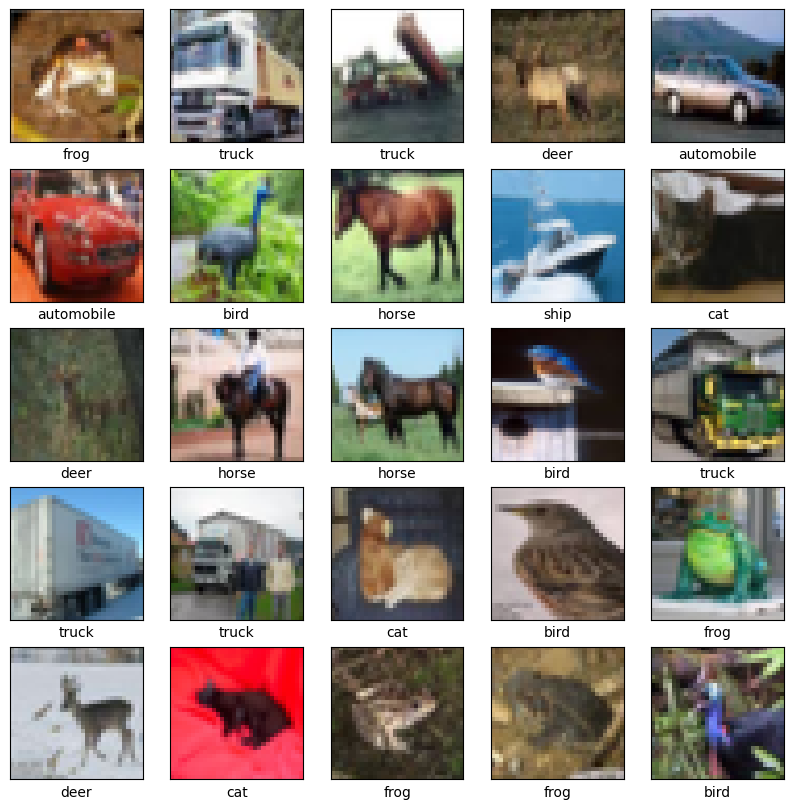

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Create the convolutional base
The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure our CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument input_shape to our first layer.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.2))

Let's display the architecture of our model so far.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 dropout (Dropout)           (None, 4, 4, 64)          0

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.


### Add Dense layers on top

To complete our model, you will feed the last output tensor from the convolutional base (of shape (3, 3, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs and a softmax activation.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Here's the complete architecture of our model.




In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 dropout (Dropout)           (None, 4, 4, 64)          0

As you can see, our (3, 3, 64) outputs were flattened into vectors of shape (576) before going through two Dense layers.


### Compile and Train the model


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.5319 - accuracy: 0.4375 - val_loss: 1.2837 - val_accuracy: 0.5360
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1838 - accuracy: 0.5804 - val_loss: 1.1224 - val_accuracy: 0.5919
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0439 - accuracy: 0.6313 - val_loss: 0.9769 - val_accuracy: 0.6580
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9406 - accuracy: 0.6697 - val_loss: 0.9055 - val_accuracy: 0.6838
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8710 - accuracy: 0.6954 - val_loss: 0.9342 - val_accuracy: 0.6706
Epoch 6/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.8214 - accuracy: 0.7117 - val_loss: 0.8730 - val_accuracy: 0.6967
Epoch 7/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7726 - accuracy: 0.7306 - val_loss: 0.8159 -

In [ ]:
history.history['val_acc']

NameError: ignored

### Evaluate the model


313/313 - 4s - loss: 0.8442 - accuracy: 0.7104 - 4s/epoch - 14ms/step
0.7103999853134155


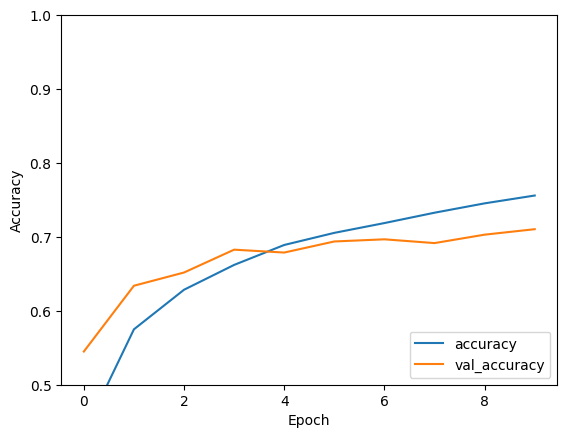

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

Our simple CNN has achieved a test accuracy of over 70%.


# Task 1 (20 points): Comparing networks

Compare the accuracy of the Convolutional Neural Network(CNN) above to the accuracy of simple dense neural networks with 0, 1, 2, 3, and 4 hidden layers of 512 rectified linear units (ReLU). Produce a plot that contains 6 curves (one for the convolutional neural network and one for each dense neural network of 0 - 4 hidden layers). The y-axis is the test accuracy, and the x-axis is the number of epochs (# of passes through the training set). Produce curves for the first 10 epochs. Although 10 epochs are not sufficient to reach convergence, it is sufficient to see the pattern. Explain the results - why some models perform better or worse than other models.

In [ ]:
model2 = models.Sequential()

#0 hidden networks
model2.add(layers.Flatten())
model2.add(layers.Dense(10, activation='softmax'))
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
network0 = model2.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


#1 hidden network
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))
network1 = model2.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


#2 hidden layers
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))
network2 = model2.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

#3 hidden layers
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))
network3 = model2.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

#4 hidden layers
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))
network4 = model2.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9595 - accuracy: 0.3177 - val_loss: 1.8912 - val_accuracy: 0.3383
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8808 - accuracy: 0.3496 - val_loss: 1.8291 - val_accuracy: 0.3568
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8577 - accuracy: 0.3602 - val_loss: 1.8233 - val_accuracy: 0.3728
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8427 - accuracy: 0.3681 - val_loss: 1.9029 - val_accuracy: 0.3579
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8272 - accuracy: 0.3739 - val_loss: 1.8369 - val_accuracy: 0.3641
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8163 - accuracy: 0.3792 - val_loss: 2.0335 - val_accuracy: 0.3085
Epoch 7/10
1563/1563 [==============================] - 5s 4ms/step - loss: 1.8191 - accuracy: 0.3771 - val_loss: 1.8237 - val_accuracy:

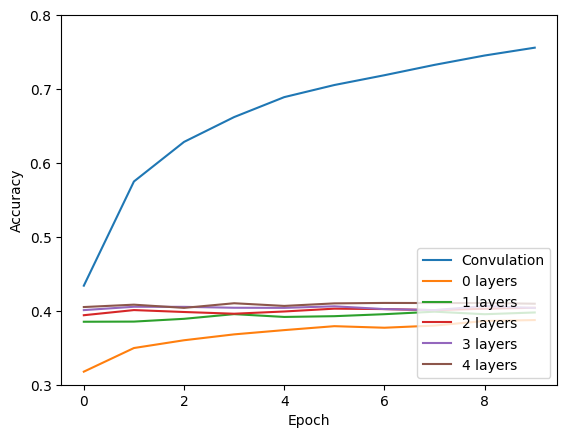

In [ ]:
plt.plot(history.history['accuracy'], label='Convulation')
plt.plot(network0.history['accuracy'], label='0 layers')
plt.plot(network1.history['accuracy'], label='1 layers')
plt.plot(network2.history['accuracy'], label='2 layers')
plt.plot(network3.history['accuracy'], label='3 layers')
plt.plot(network4.history['accuracy'], label='4 layers')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 0.8])
plt.legend(loc='lower right')


Based on the graph, it is evident that the convolution network outperformed the others. Furthermore, there doesn't seem to be much of a difference between hidden networks 1, 2, 3, and 4 and the convulation network. It should be mentioned, nevertheless, that training all five of the other networks took less time than training the convulation network. It makes logical that a netork with 0 layers would be the worst possible as learning is practically impossible because the data are being transferred straight from the input to the output.



# Task 2 (10 points): Comparing Activation functions

Compare the accuracy achieved by rectified linear units and sigmoid units in the convolutional neural network. Modify the code from the example above to use sigmoid units. Produce a plot that contains 2 curves (one for rectified linear units and another for sigmoid units). The y-axis is the test accuracy, and the x-axis is the number of epochs (# of passes through the training set). Produce curves for the first 10 epochs. Although 10 epochs are not sufficient to reach convergence, it is sufficient to see the pattern. Explain the results - why one model performed better than the other model).


In [ ]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(32, 32, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model3.add(layers.Dropout(0.2))

model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 dropout_1 (Dropout)         (None, 4, 4, 64)         

In [ ]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historySigmoid = model3.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 85s 54ms/step - loss: 2.1087 - accuracy: 0.2028 - val_loss: 1.9118 - val_accuracy: 0.2914
Epoch 2/10
1563/1563 [==============================] - 82s 53ms/step - loss: 1.7594 - accuracy: 0.3601 - val_loss: 1.6162 - val_accuracy: 0.4218
Epoch 3/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.5797 - accuracy: 0.4323 - val_loss: 1.4830 - val_accuracy: 0.4682
Epoch 4/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.4910 - accuracy: 0.4626 - val_loss: 1.4385 - val_accuracy: 0.4865
Epoch 5/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.4221 - accuracy: 0.4921 - val_loss: 1.3816 - val_accuracy: 0.4981
Epoch 6/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.3687 - accuracy: 0.5096 - val_loss: 1.3385 - val_accuracy: 0.5228
Epoch 7/10
1563/1563 [==============================] - 83s 53ms/step - loss: 1.3220 - accuracy: 0.5271 - val_loss: 1.3001 -

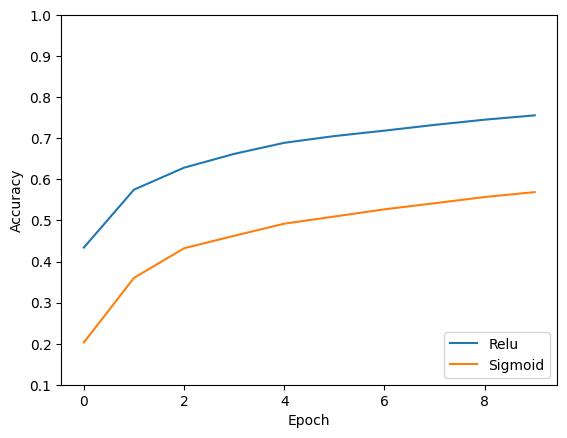

In [ ]:
plt.plot(history.history['accuracy'], label='Relu')
plt.plot(historySigmoid.history['accuracy'], label='Sigmoid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

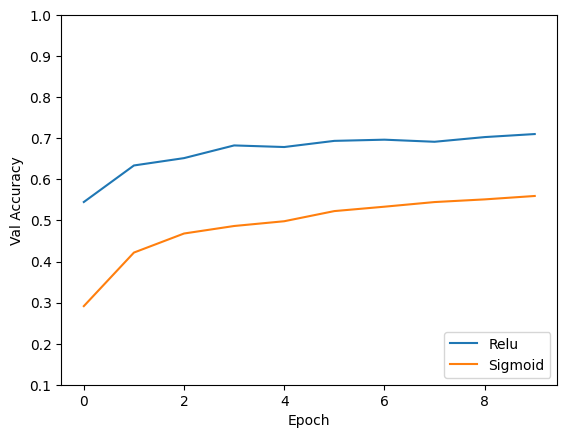

In [ ]:
plt.plot(history.history['val_accuracy'], label='Relu')
plt.plot(historySigmoid.history['val_accuracy'], label='Sigmoid')
plt.xlabel('Epoch')
plt.ylabel('Val Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

When computing relu units, use h = max(0, a), where a = Wx + b. The output of a relu unit is either 0 or 1.

The function h = 1/(1+ e^x) can be used to describe sigmoid. Sigmoid units generate and output values between 0 and 1.



The sigmoid units were underperformed by the relu units. Because they eliminate the vanishing gradient issue while still providing all the benefits of sigmoid units, relu units are a better option than sigmoid units. Additionally, it is evident that Relu units begin considerably better, suggesting a greater rate of learning. The two have quite similar paths for their lines of accuracy, with the relu one starting around 20% higher. Although the validation accuracy is comparable, the amount of relu

# Task 3 (10 points): The value of dropout

Compare the accuracy achieved with and without dropout in the convolutional neural network. Modify the code from the example above to turn on and off dropout in all the Conv2D layers. Produce two graphs (one for training accuracy and the other one for test accuracy) containing 2 curves (with and without dropout). The y-axis is the accuracy (i.e., train or test/validation accuracy), and the x-axis is the number of epochs (# of passes through the training set). Produce curves for as many epochs as you can up to 25 epochs. Explain the results (i.e., why some models performed better or worse than other models and are the results consistent with the theory). No marks will be deducted for doing less than 25 epochs; however, explain what you expect to see in the curves as the number of epochs reaches 25.

In [ ]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.Dropout(0))

model4.add(layers.Flatten())
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(10, activation='softmax'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 dropout_2 (Dropout)         (None, 4, 4, 64)         

In [ ]:
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyDropout = model4.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 85s 53ms/step - loss: 1.4921 - accuracy: 0.4575 - val_loss: 1.3012 - val_accuracy: 0.5328
Epoch 2/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.1056 - accuracy: 0.6106 - val_loss: 1.0143 - val_accuracy: 0.6385
Epoch 3/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9550 - accuracy: 0.6634 - val_loss: 0.9704 - val_accuracy: 0.6603
Epoch 4/10
1563/1563 [==============================] - 73s 46ms/step - loss: 0.8615 - accuracy: 0.6983 - val_loss: 0.9315 - val_accuracy: 0.6783
Epoch 5/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7917 - accuracy: 0.7215 - val_loss: 0.9054 - val_accuracy: 0.6911
Epoch 6/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7366 - accuracy: 0.7407 - val_loss: 0.8549 - val_accuracy: 0.7105
Epoch 7/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.6868 - accuracy: 0.7578 - val_loss: 0.8432 -

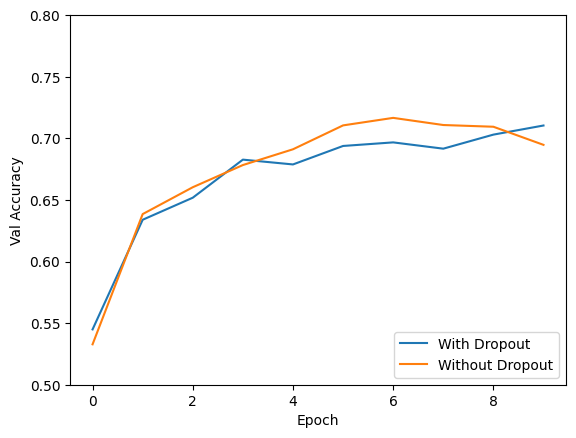

In [ ]:
plt.plot(history.history['val_accuracy'], label='With Dropout')
plt.plot(historyDropout.history['val_accuracy'], label='Without Dropout')
plt.xlabel('Epoch')
plt.ylabel('Val Accuracy')
plt.ylim([0.5, 0.8])
plt.legend(loc='lower right')

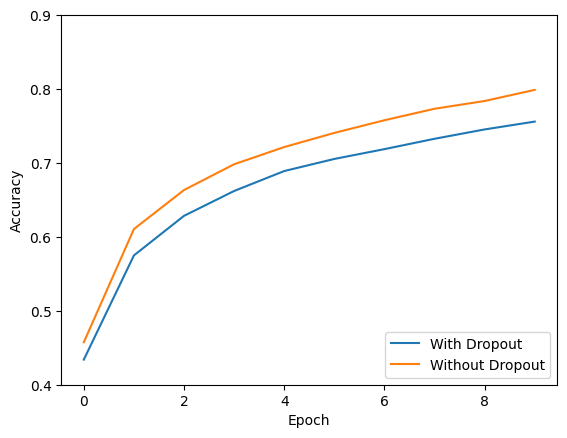

In [ ]:
plt.plot(history.history['accuracy'], label='With Dropout')
plt.plot(historyDropout.history['accuracy'], label='Without Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 0.9])
plt.legend(loc='lower right')

In order to prevent overfitting, dropout is applied, as the two graphs above make evident. To start, merely glancing at the graphs' final result:
1. There is a nearly 10% difference between the accuracy without dropout and the validation accuracy without dropout. Validation accuracy remains constant while normal accuracy increases gradually without dropout.
2. Although the graph with dropout exhibits significantly closer accuracy and validation accuracy, it takes the graph longer to achieve the same level of accuracy.
For training, the model with dropout was marginally quicker than the model without dropout.